# 25934 Applied Financial Econometrics - Empirical Project 1
#### `Name: Lachlan O'Malley`
#### `Student ID: 13227133`
___


### Import Statements

In [1]:
import project1 as p

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import plotly.graph_objects as go

import statsmodels
# we will use `smf` and `sm` to constract and estimate same regressions but using different ways
import statsmodels.formula.api as smf  
import statsmodels.api as sm
import statsmodels.stats.api as sms
from patsy import dmatrices
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas_datareader import data
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.tsa.api as smt
import pickle
import warnings
warnings.filterwarnings('ignore')

sns.set(color_codes=True)
sns.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=500)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

from arch.univariate import arch_model, ARX, ARCH, GARCH, StudentsT
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

### User-generated functions

In [3]:
ticker_list={'^DJI':'DJIA Index', 
            'TSLA':'Tesla',
            'FCX':'Freeport-McMoRan'}
print(ticker_list)

{'^DJI': 'DJIA Index', 'TSLA': 'Tesla', 'FCX': 'Freeport-McMoRan'}


### Part 1: Loading the Data

In [4]:
df=p.read_data(ticker_list)
df

^DJI        TSLA        FCX
Date                                           
2014-12-31  17823.070312   44.481998  21.758982
2015-01-02  17832.990234   43.862000  21.935959
2015-01-05  17501.650391   42.018002  20.631910
2015-01-06  17371.640625   42.256001  20.985870
2015-01-07  17584.519531   42.189999  21.293251
...                  ...         ...        ...
2022-02-23  33131.761719  764.039978  42.459999
2022-02-24  33223.828125  800.770020  43.720001
2022-02-25  34058.750000  809.869995  46.340000
2022-02-28  33892.601562  870.429993  46.950001
2022-03-01  33294.949219  864.369995  47.910000

[1804 rows x 3 columns]

___

## Part 2: Unit Root & Stationarity Check
- Check your price series for stationarity using ADF and KPSS tests.
- Convert your closing prices to log returns and check your return series for stationarity using ADF and KPSS tests.
- What do you conclude? In (a) and (b) above, did you use constant only or constant and a trend model as as your benchmark and why? Discuss.


#### Question 2a

In [5]:
#Check stationarity using Augmented Dickey Fuller (ADF) and Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
x= df['^DJI']
p.ADFtest(x,autolagcriterion='BIC')
p.KPSStest(x)

Augmented Dickey-Fuller unit root test results:
	Test statistics:		   -0.8138.
	Test p-value:			    0.8150.
	Number of lags selected:	    9.0000.
	OUTCOME: Fail to reject the null hypothesis. Series appear to contain unit root.
Kwiatkowski-Phillips-Schmidt-Shin test for stationarity results:
	Test statistics:		    5.8477.
	Test p-value:			    0.0100.
	Number of lags selected:	   27.0000.
	OUTCOME: Reject the null hypothesis. Series is non-stationary.


In [6]:
x= df['TSLA']
p.ADFtest(x,autolagcriterion='BIC')
p.KPSStest(x)

Augmented Dickey-Fuller unit root test results:
	Test statistics:		    0.1571.
	Test p-value:			    0.9698.
	Number of lags selected:	    0.0000.
	OUTCOME: Fail to reject the null hypothesis. Series appear to contain unit root.
Kwiatkowski-Phillips-Schmidt-Shin test for stationarity results:
	Test statistics:		    3.9616.
	Test p-value:			    0.0100.
	Number of lags selected:	   27.0000.
	OUTCOME: Reject the null hypothesis. Series is non-stationary.


In [7]:
x= df['FCX']
p.ADFtest(x,autolagcriterion='BIC')
p.KPSStest(x)

Augmented Dickey-Fuller unit root test results:
	Test statistics:		    0.5911.
	Test p-value:			    0.9874.
	Number of lags selected:	    0.0000.
	OUTCOME: Fail to reject the null hypothesis. Series appear to contain unit root.
Kwiatkowski-Phillips-Schmidt-Shin test for stationarity results:
	Test statistics:		    2.6784.
	Test p-value:			    0.0100.
	Number of lags selected:	   27.0000.
	OUTCOME: Reject the null hypothesis. Series is non-stationary.


#### Part 2b

In [8]:
#Convert prices to log returns
data = df.copy()
ret = p.get_log_returns(data)
ret.head()

^DJI      TSLA       FCX
Date                                    
2014-12-31  0.000000  0.000000  0.000000
2015-01-02  0.000556 -0.014036  0.008101
2015-01-05 -0.018755 -0.042950 -0.061288
2015-01-06 -0.007456  0.005648  0.017010
2015-01-07  0.012180 -0.001563  0.014541

In [9]:
x= ret['^DJI']
p.ADFtest(x,autolagcriterion='BIC')
p.KPSStest(x)

Augmented Dickey-Fuller unit root test results:
	Test statistics:		  -13.3487.
	Test p-value:			    0.0000.
	Number of lags selected:	    8.0000.
	OUTCOME: Reject the null hypothesis. Series do not contain unit root.
Kwiatkowski-Phillips-Schmidt-Shin test for stationarity results:
	Test statistics:		    0.0330.
	Test p-value:			    0.1000.
	Number of lags selected:	    5.0000.
	OUTCOME: Fail to reject the null hypothesis. Series appear to be stationary.


In [10]:
x= ret['TSLA']
p.ADFtest(x,autolagcriterion='BIC')
p.KPSStest(x)

Augmented Dickey-Fuller unit root test results:
	Test statistics:		  -42.4856.
	Test p-value:			    0.0000.
	Number of lags selected:	    0.0000.
	OUTCOME: Reject the null hypothesis. Series do not contain unit root.
Kwiatkowski-Phillips-Schmidt-Shin test for stationarity results:
	Test statistics:		    0.3477.
	Test p-value:			    0.0997.
	Number of lags selected:	    4.0000.
	OUTCOME: Fail to reject the null hypothesis. Series appear to be stationary.


In [11]:
x= ret['FCX']
p.ADFtest(x,autolagcriterion='BIC')
p.KPSStest(x)

Augmented Dickey-Fuller unit root test results:
	Test statistics:		  -42.1467.
	Test p-value:			    0.0000.
	Number of lags selected:	    0.0000.
	OUTCOME: Reject the null hypothesis. Series do not contain unit root.
Kwiatkowski-Phillips-Schmidt-Shin test for stationarity results:
	Test statistics:		    0.3171.
	Test p-value:			    0.1000.
	Number of lags selected:	    1.0000.
	OUTCOME: Fail to reject the null hypothesis. Series appear to be stationary.


#### Question 2c

`Note: all tests are run at a chosen significance level of 95%`

Running the Augmented Dickey Fuller test on the **raw price data** concludes that all equities fail to reject the null hypothesis; meaning the **unit root likely exists** within the series with an alpha of 0.05. Unsurprisingly, the Kwiatkowski-Phillips-Schmidt-Shin test therefore rejects the null hypothesis; meaning the series is **not stationary.**

Alternatively when we convert the raw data into **log returns** we observe pecentage change of prices which are log-normally distributed. One reason for this is that prices cannot assume a negative value and as the stock price goes closer to 0, the movement becomes smaller. Therein, the ADF test for all equities rejects the null hypothesis; **unit root does not exist.** Similarly, the KPSS test concludes a failure to reject the null hypothesis. Put simply we assume that stationarity is innocent until proven guilty. Since the test rejects the null we can assume innocence **(stationarity.)**

Both question 2(a),(b) have used **constant only** as a benchmark. Visual inspection of our financial data and basic economic intuition highlights that while equities have some positive up-trend over large periods, this is not significant within our limited timeframe. 

In considering whether to use constant or constant and a trend in the test it depended on the appropriateness of the alternative hypothesis :
* If the alternative is that the series is stationary about a trend then it should include a constant and trend in the test. Consider log(GDP). Your alternative here would be that apart from a random disturbance log(GDP) might grow at a fairly constant rate. Therefore including both constant and trend would be appropriate for the series time
* Alternatively, consider an interest rate or in our case equity log(returns). Clearly, if this is stationary it can not be expected to grow but should be stationary about some non-zero constant. Therefore in an ADF/KPSS style test, I included a constant only.


___

## Part 3: Cumulative Return Plot
- Plot cumulative returns orgininating at $100 from 1-Jan-2015 to 1-Mar-2022

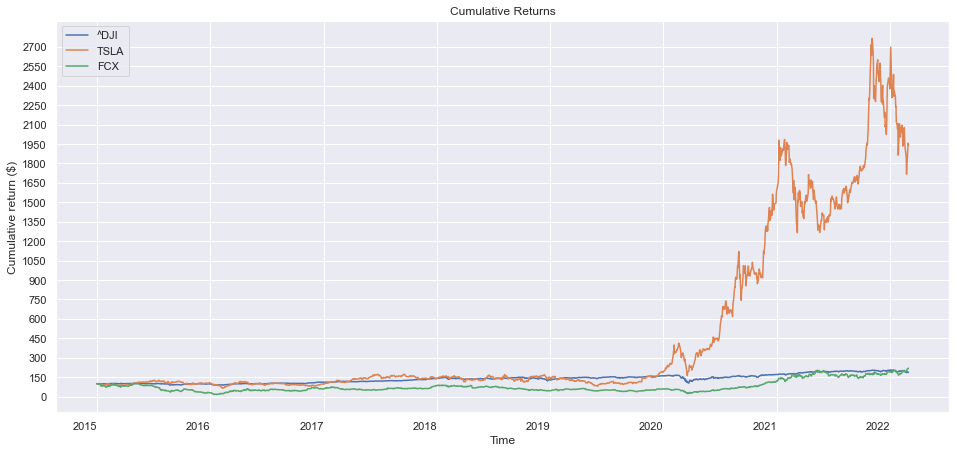

In [12]:
(100*(np.exp(ret.cumsum())-1)+100).plot(title='Cumulative Returns', 
                                        figsize=(16,8), ylabel='Cumulative return ($)', xlabel='Time')
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0,2800,150))
plt.show()

Needs to include:
- Three assets originating at $100
- xaxis: Time, yaxis: Cumulative return (Assume %) and Legend

___

## Part 4: Subplot 3x3
- Top row returns (Defined as cumulative logarithmic returns)
- Second row ACF
- Third row PACFs

Based on visual inspection would you consider an ARMA model?

In [13]:
ret = ret.iloc[1:]
ret.head()

^DJI      TSLA       FCX
Date                                    
2015-01-02  0.000556 -0.014036  0.008101
2015-01-05 -0.018755 -0.042950 -0.061288
2015-01-06 -0.007456  0.005648  0.017010
2015-01-07  0.012180 -0.001563  0.014541
2015-01-08  0.018221 -0.001566  0.022065

In [14]:
e = ret['^DJI']
f = ret['TSLA']
g = ret['FCX']

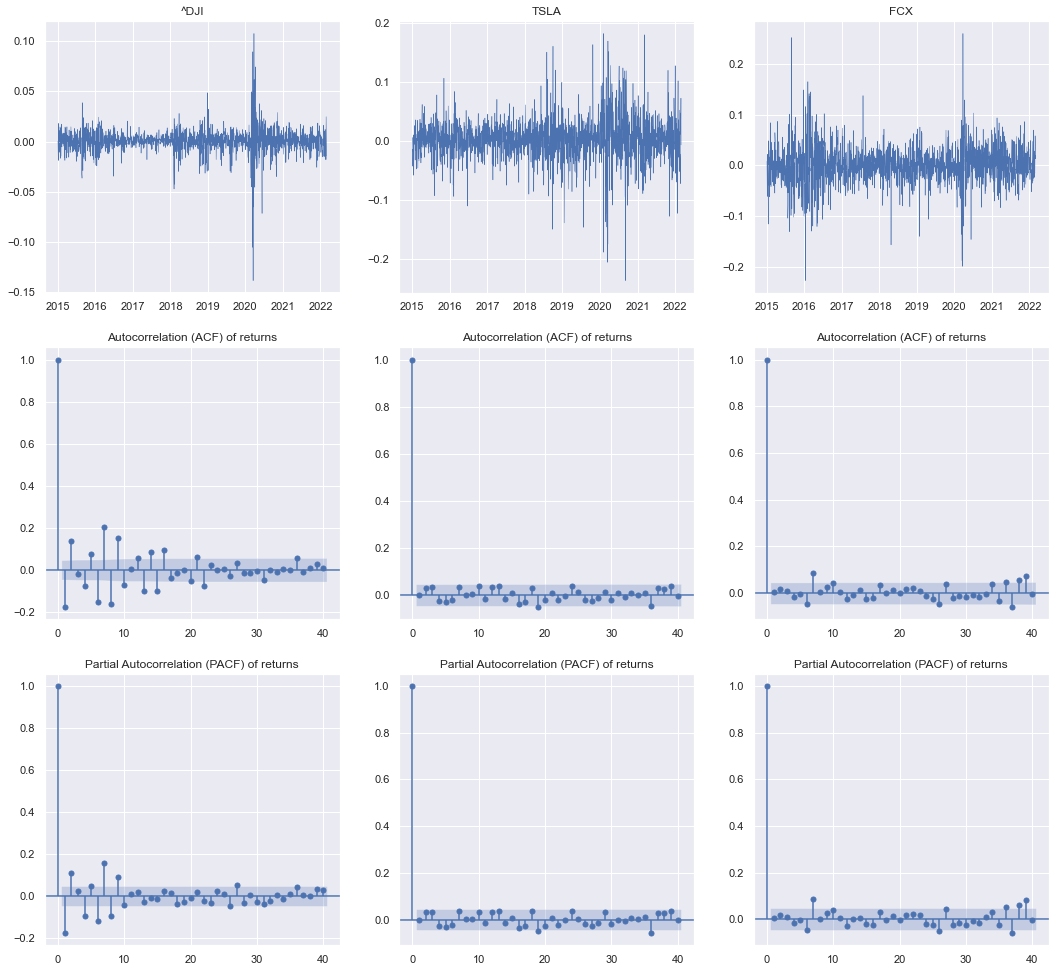

In [15]:
p.plot_TS(e,f,g,nlags=40,a=0.05)

Inspection:

**Model 1: DJI**
Both ACF and PACF presents gradual decay. The ARMA model would be most suitable as the orders of p and q for AR and MA can be more than one. Further testing would be required to derive optimal P and Q values.

**Model 2 and 3: TSLA/FCX**
The autocorrelation function (ACF) is zero apart from a single peak at lag 0. This indicates a Guassian white noise process with *(virtually)* no discernible trend. This would indicate that the ARMA model is not appropriate. This is important for two reasons:
* Predictability: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.
* Model Diagnostics: The series of errors from a time series forecast model should ideally be white noise. 



___

## Part 5: Optimal ARMA Model

#### 5 (a)

In [16]:
ret_train, ret_test = train_test_split(ret, test_size=10, shuffle=False)

In [17]:
ret_train.tail()

^DJI      TSLA       FCX
Date                                    
2022-02-08  0.010535  0.016028  0.043512
2022-02-09  0.008572  0.010788  0.069633
2022-02-10 -0.014828 -0.029895  0.008003
2022-02-11 -0.014391 -0.050505 -0.025604
2022-02-14 -0.004960  0.018160 -0.008211

In [18]:
l = ret_train['^DJI']
m = ret_train['TSLA']
n = ret_train['FCX']

In [19]:
DJI_BIC = p.ARMA_BIC(l)
TSLA_BIC = p.ARMA_BIC(m)
FCX_BIC = p.ARMA_BIC(n)

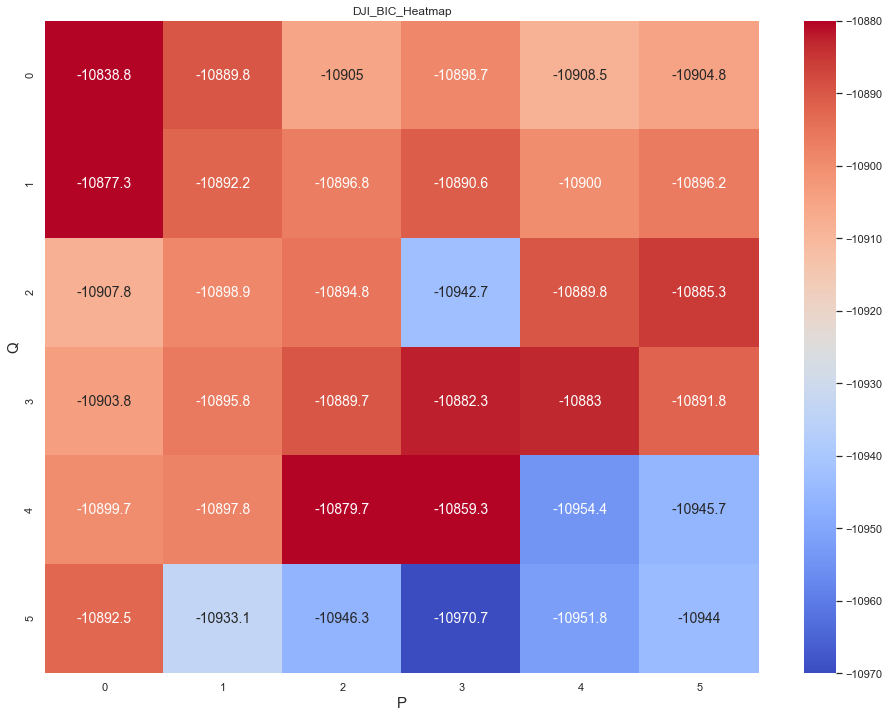

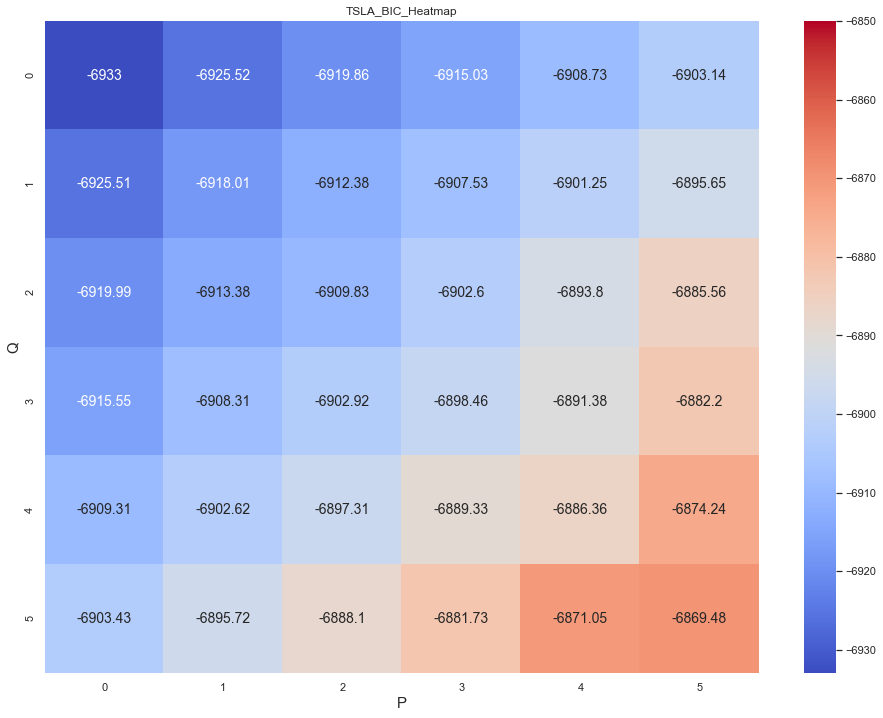

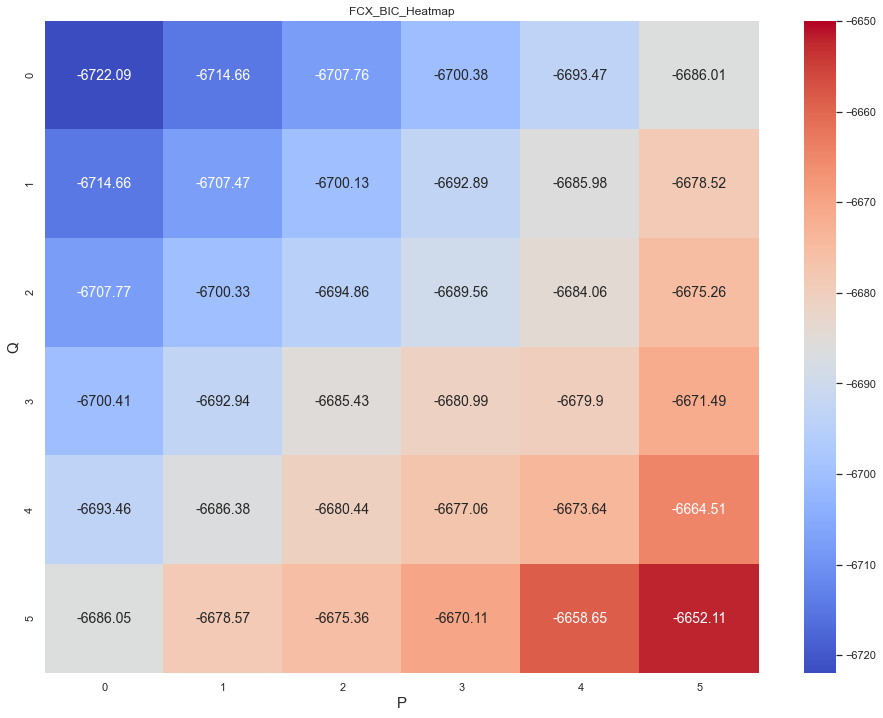

In [20]:
p.heatmap(DJI_BIC,'DJI_BIC_Heatmap', -10970,-10880)
p.heatmap(TSLA_BIC,'TSLA_BIC_Heatmap', -6933,-6850)
p.heatmap(FCX_BIC,'FCX_BIC_Heatmap', -6722,-6650)

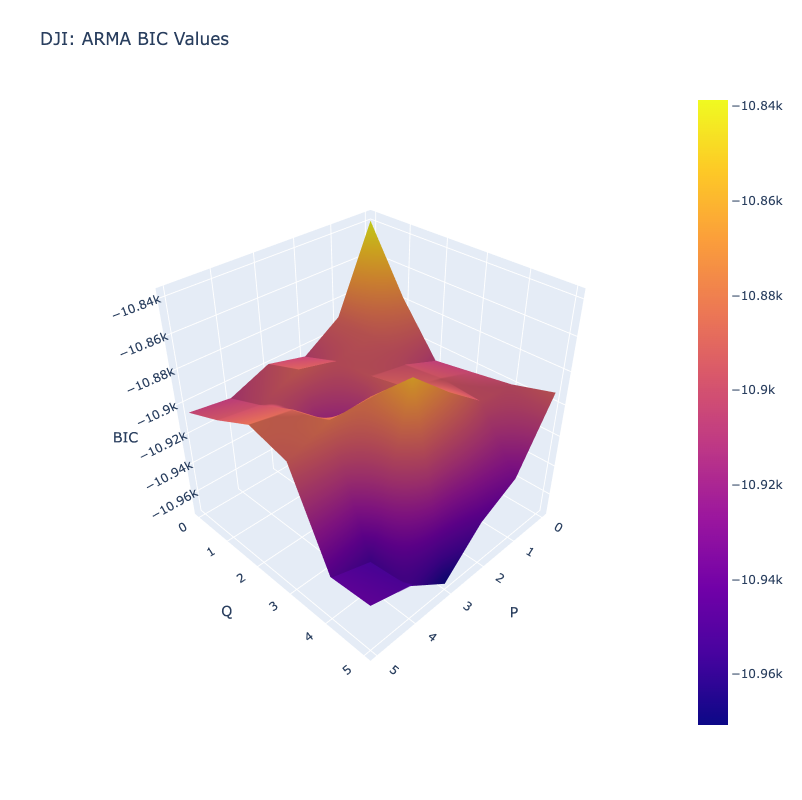

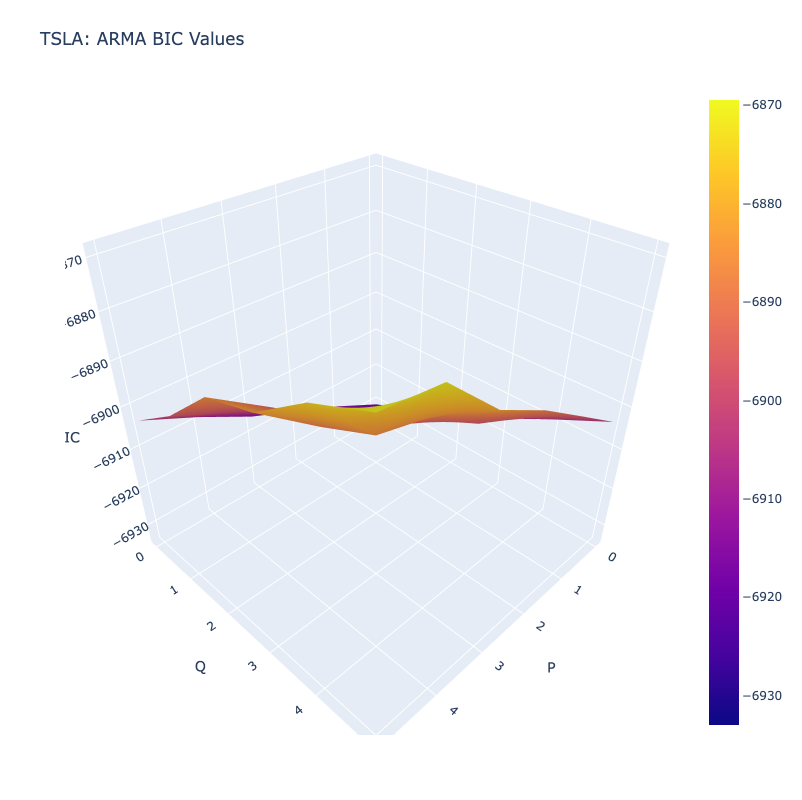

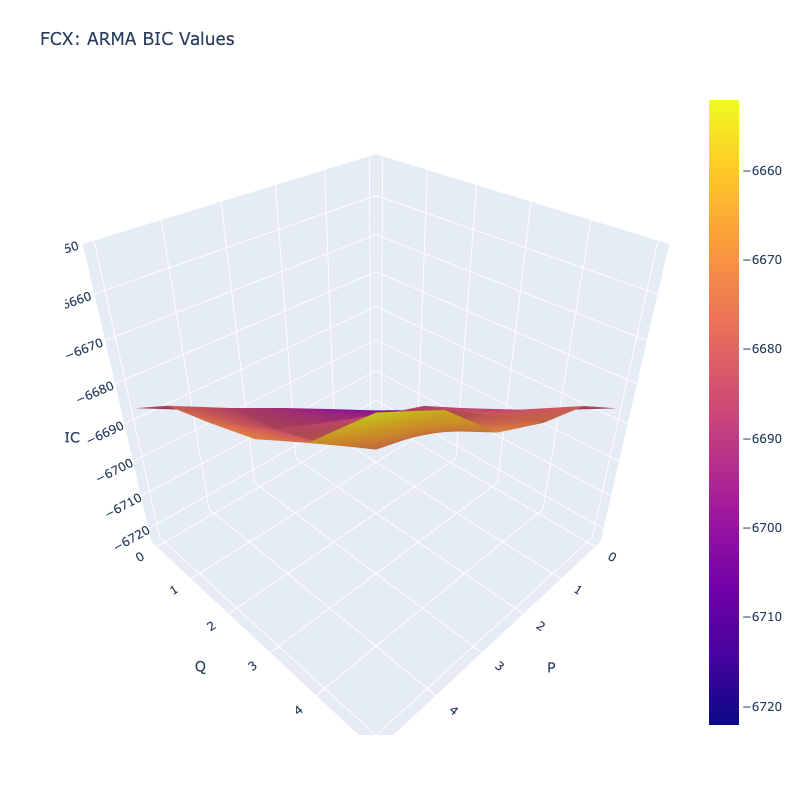

In [21]:
p.plotting_3D(DJI_BIC,'DJI: ARMA BIC Values','BIC')
p.plotting_3D(TSLA_BIC,'TSLA: ARMA BIC Values','BIC')
p.plotting_3D(FCX_BIC,'FCX: ARMA BIC Values','BIC')

## 5 (b)

**Optimal ARMA Values Based on BIC**

Autoregressive Moving Average (ARMA) models.  
* DJI: $ARMA(3,5)$ model with p=3, and q=5.
* FCX: $ARMA(0, 0)$ model is a white noise model.
* TSLA: $ARMA(0, 0)$ model is a white noise model.

## 5 (c)

In [22]:
def ARMA_MIN_RMSE(train,test,n=5):
    
    """This function iterates through all the possible combinations of 'P' and 'Q'
    to locate the model that minimises the RMSE"""
    
    for col in train.columns:
        for p in range(0,n+1):
            for q in range (0,n+1):
                current_train = [x for x in train[col]]
                current_test = [x for x in test[col]]
                predictions = []
                ci_l = []
                ci_u = []
                for t in range(len(current_test)):
                    # estimate ARMA model
                    model = sm.tsa.arima.ARIMA(current_train, order=(p,0,q),trend='c')
                    model_fit = model.fit()

                    # forecast 1 step ahead
                    output= model_fit.get_forecast(steps=1).summary_frame()

                    # save the output
                    yhat = output.iloc[0,0]    # your single predicted value from the model
                    predictions.append(yhat)   # ever growing list of predicted values
                    obs = current_test[t]              # your single actual value taken from the TEST data
                    ci_l.append(output.iloc[0,2])    # CIs for the prediction (growing set)
                    ci_u.append(output.iloc[0,3])
                    #print('predicted=%f, expected=%f, length of history=%f' % (yhat, obs, len(current_train)))

                    # Remove the first observation in the training set (history)
                    # If active: rolling window, 
                    # If inactive: expanding window.
                    #current_train.pop(0) # see exlplanation right above

                    current_train.append(obs)       # ever growing list of actual values - these are the same as TEST data
                error = mean_squared_error(current_test, predictions, squared=False)
      
                print (col, F'{p},0,{q}','Test RMSE: %.5f' % error)

In [23]:
ARMA_MIN_RMSE(ret_train,ret_test,n=5)

^DJI 0,0,0 Test RMSE: 0.01382
^DJI 0,0,1 Test RMSE: 0.01427
^DJI 0,0,2 Test RMSE: 0.01522
^DJI 0,0,3 Test RMSE: 0.01527
^DJI 0,0,4 Test RMSE: 0.01531
^DJI 0,0,5 Test RMSE: 0.01529
^DJI 1,0,0 Test RMSE: 0.01449
^DJI 1,0,1 Test RMSE: 0.01471
^DJI 1,0,2 Test RMSE: 0.01507
^DJI 1,0,3 Test RMSE: 0.01527
^DJI 1,0,4 Test RMSE: 0.01566
^DJI 1,0,5 Test RMSE: 0.01500
^DJI 2,0,0 Test RMSE: 0.01507
^DJI 2,0,1 Test RMSE: 0.01514
^DJI 2,0,2 Test RMSE: 0.01510
^DJI 2,0,3 Test RMSE: 0.01532
^DJI 2,0,4 Test RMSE: 0.01589
^DJI 2,0,5 Test RMSE: 0.01467
^DJI 3,0,0 Test RMSE: 0.01516
^DJI 3,0,1 Test RMSE: 0.01516
^DJI 3,0,2 Test RMSE: 0.01543
^DJI 3,0,3 Test RMSE: 0.01526
^DJI 3,0,4 Test RMSE: 0.01575
^DJI 3,0,5 Test RMSE: 0.01463
^DJI 4,0,0 Test RMSE: 0.01552
^DJI 4,0,1 Test RMSE: 0.01553
^DJI 4,0,2 Test RMSE: 0.01546
^DJI 4,0,3 Test RMSE: 0.01570
^DJI 4,0,4 Test RMSE: 0.01474
^DJI 4,0,5 Test RMSE: 0.01508
^DJI 5,0,0 Test RMSE: 0.01537
^DJI 5,0,1 Test RMSE: 0.01538
^DJI 5,0,2 Test RMSE: 0.01546
^DJI 5,0,3

**Optimal ARMA Forecasting Values Based on RMSE Rolling Scheme**

Autoregressive Moving Average (ARMA) models.  
* DJI: $ARMA(0, 0)$ 
* FCX: $ARMA(3, 2)$ 
* TSLA: $ARMA(2, 2)$ 

**Optimal ARMA Forecasting Values Based on RMSE Expanding(Recursive) Scheme**

Autoregressive Moving Average (ARMA) models.  
* DJI: $ARMA(0, 0)$ 
* FCX: $ARMA(3, 4)$ 
* TSLA: $ARMA(5, 5)$ 


**Recursive vs Rolling Scheme**

The rolling approach makes use of fixed windows of data to re-estimate the parameters over the test sample period (i.e. always incorporating new information to forecast the future), whereas the recursive (expanding) approach makes use of an increasing window to re-estimate the models (i.e. uses new information but keeps old data).

In our project the recursive scheme seems most applicable due to the limited nature of the train set (1793 observations). As expanding (recursive) scheme keeps using old sample information it makes sense to use all information available. 


## 5 (d)

**Findings:**

* Highlighted in 5(c) using (unpenalized) RMSE is extending the lag length. (i.e., including more lags as explanatory variables) Therein, the results will likely yield a better value for RMSE. This is because the fit will not get worse by including more explanatory variables (increasing the number of x values to explain y), and the RMSE is a direct measure of fit.  Part 4 of the project demonstrates that TSLA and FCX maintain serially uncorrelated random variables (white noise), which by definition is largely unpredicatable. So forecasting for these equities is likely going to show haphazard forecastability.

Conclusively, ARMA(p,q) values using a Baysian Information Co-efficient is most favourable. The BIC ARMA values follow the most conservative parameter restrictions. Moreover, the BIC favors more parsimonious models over more complex models (i.e., it adds a penalty based on the number of parameters being estimated in the model). 
* More relevant discussion for the differences between BIC and AIC are discussed in question 6.


___

## Part 6: Optimal ARMA Using AIC

In [24]:
DJI_AIC = p.ARMA_AIC(l)
TSLA_AIC = p.ARMA_AIC(m)
FCX_AIC = p.ARMA_AIC(n)

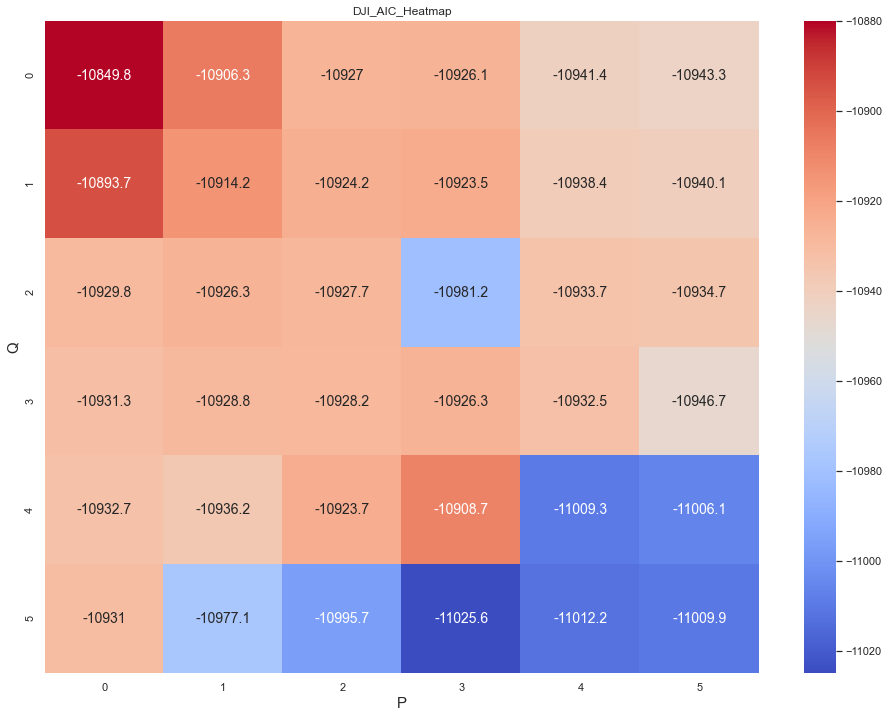

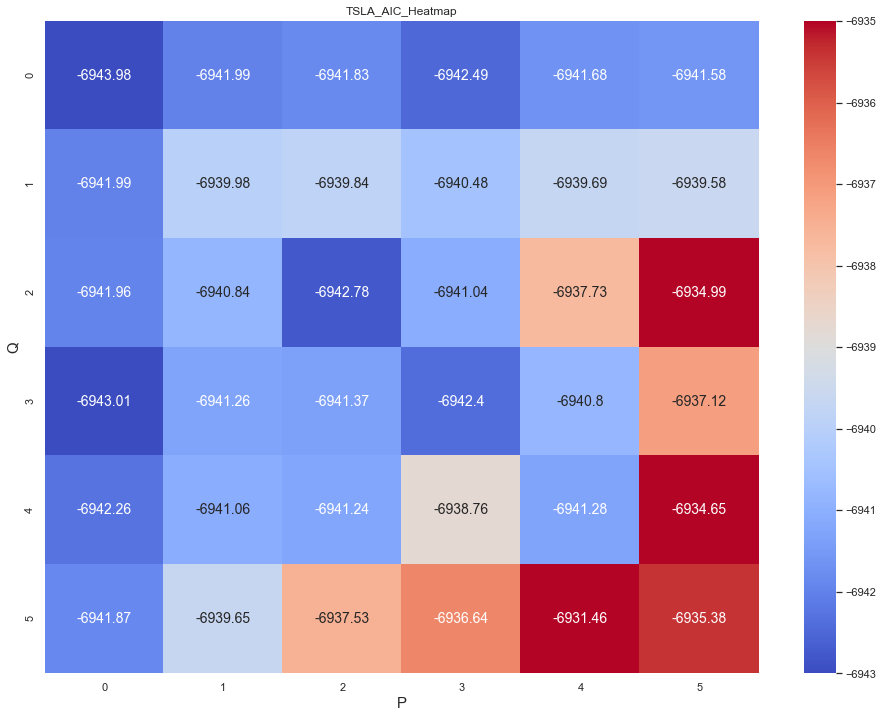

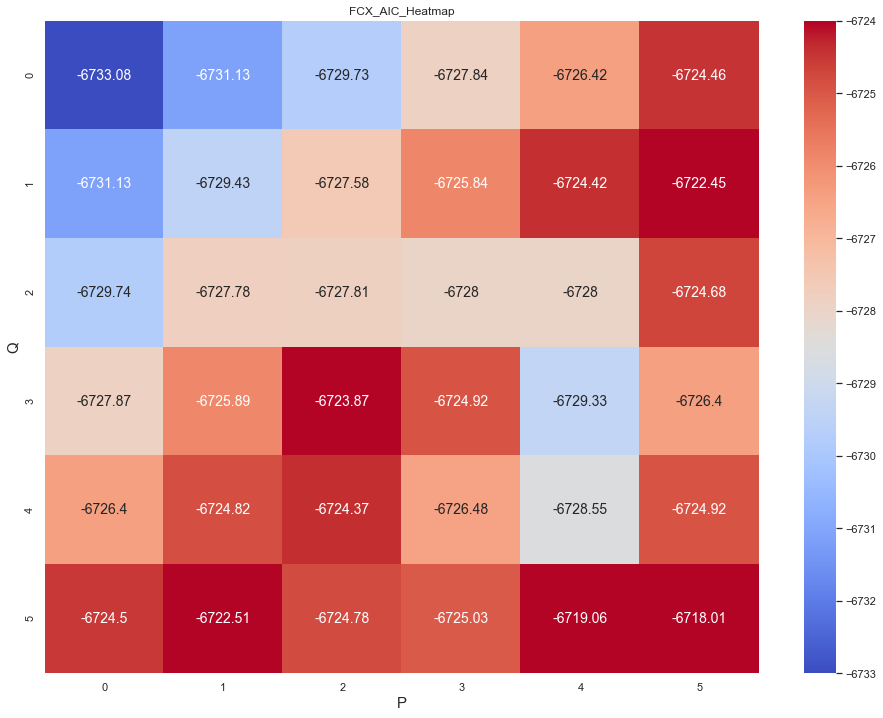

In [25]:
p.heatmap(DJI_AIC,'DJI_AIC_Heatmap', -11025,-10880)
p.heatmap(TSLA_AIC,'TSLA_AIC_Heatmap', -6943,-6935)
p.heatmap(FCX_AIC,'FCX_AIC_Heatmap', -6733,-6724)

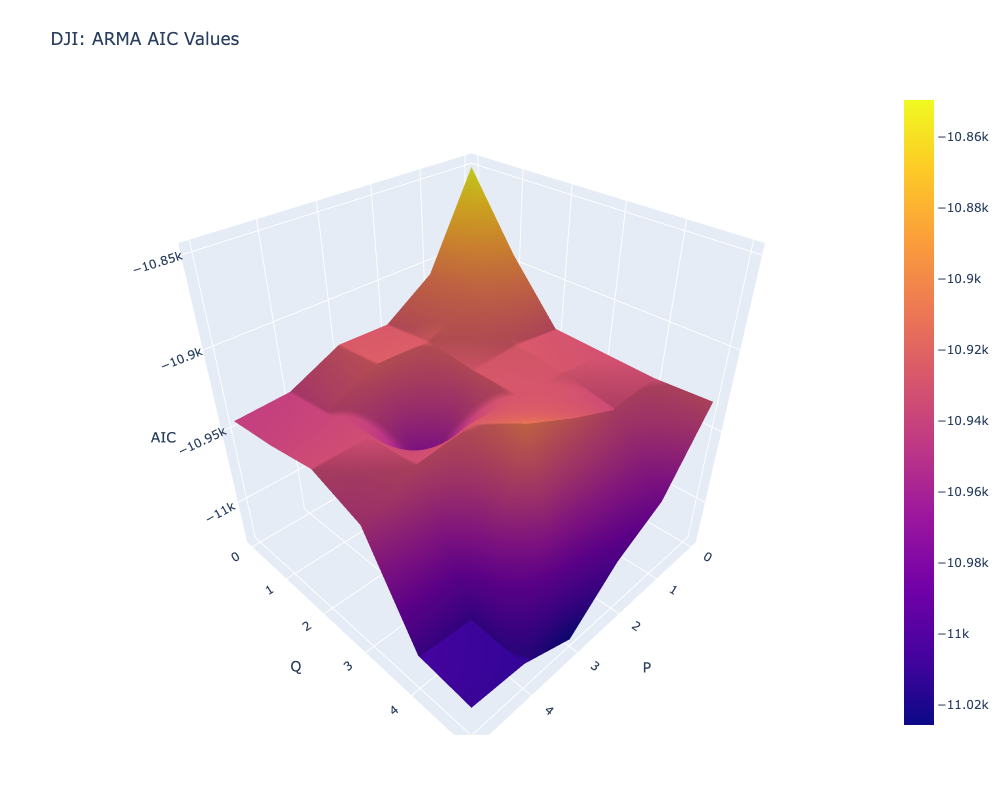

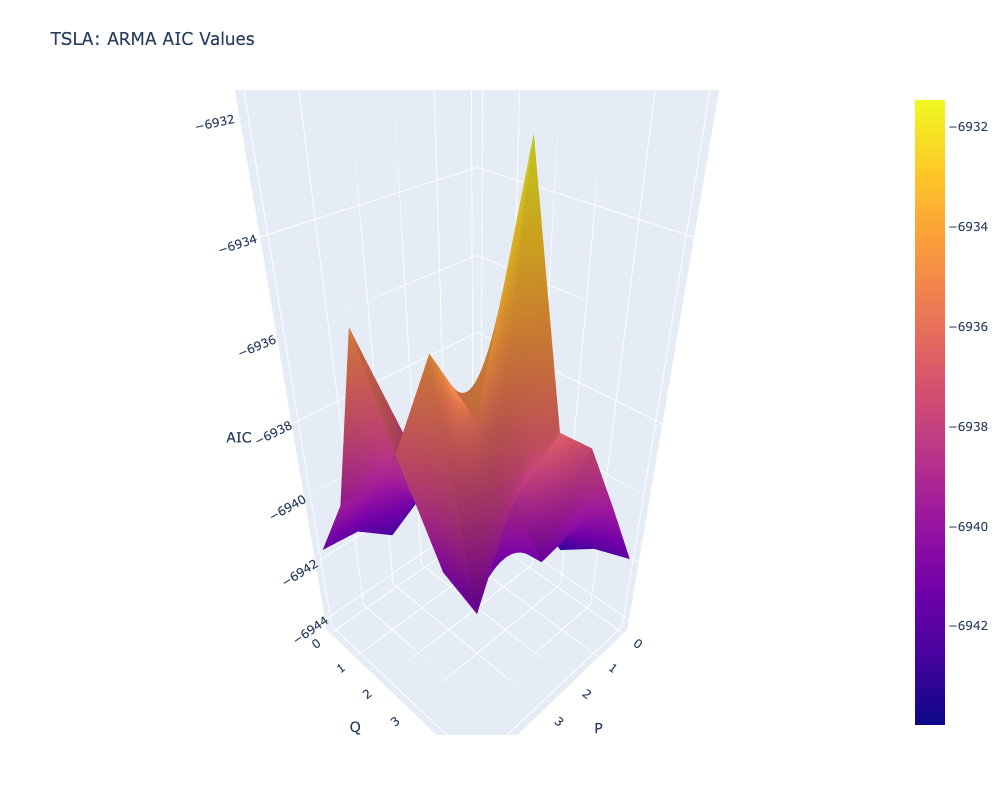

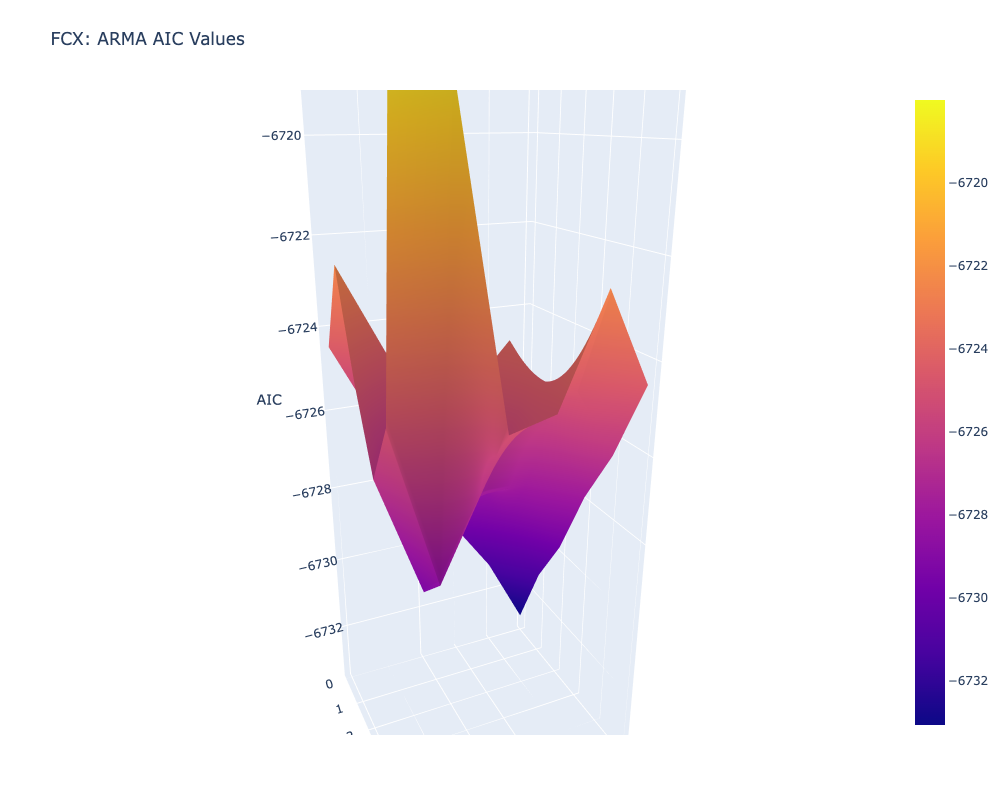

In [26]:
p.plotting_3D(DJI_AIC,'DJI: ARMA AIC Values','AIC')
p.plotting_3D(TSLA_AIC,'TSLA: ARMA AIC Values','AIC')
p.plotting_3D(FCX_AIC,'FCX: ARMA AIC Values','AIC')

**Optimal ARMA Values Based on AIC**

Autoregressive Moving Average (ARMA) models.  
* DJI: $ARMA(3,5)$ model with p=3, and q=5.
* FCX: $ARMA(0, 0)$ model is a white noise model.
* TSLA: $ARMA(0, 0)$ model is a white noise model.

***
## Brownie Points (Textbook Cheat Code)
***

In [27]:
#Sanity check
DJI= smt.arma_order_select_ic(l, max_ar=5, max_ma=5, ic=['aic', 'bic'],   fit_kw={'method':'css-mle','solver':'bfgs'})
TSLA= smt.arma_order_select_ic(m, max_ar=5, max_ma=5, ic=['aic', 'bic'],   fit_kw={'method':'css-mle','solver':'bfgs'})
FCX= smt.arma_order_select_ic(n, max_ar=5, max_ma=5, ic=['aic', 'bic'],   fit_kw={'method':'css-mle','solver':'bfgs'}) 

In [28]:
print(DJI.aic_min_order)
print(DJI.bic_min_order)

(3, 4)
(2, 2)


In [29]:
print(TSLA.aic_min_order)
print(TSLA.bic_min_order)

(5, 5)
(0, 0)


In [30]:
print(FCX.aic_min_order)
print(FCX.bic_min_order)

(3, 3)
(0, 0)


**Did the conclusion change???**

From visually observing the Akaike information criterion (AIC) P, Q values it is noteworthy to mention that AIC asymptotically selects a true model that strictly overfits, i.e. a model that is larger than the smallest true model. Therefore, the conclusion has not changed and **BIC maintains optimal** for selecting both $P,Q$ values.

The difference between BIC and AIC is demonstrated when we add more k parameters (regressors or/and intercept), in order to increase the goodness of fit of the model. In such a case, the BIC penalises more (in comparison to the AIC) such an increase of parameters. For this reason, BIC maintains the most conservative and appropriate approach for the ARMA model.


___

## Part 7: Squared Return 3 x 3 Subplot

In [31]:
square_ret = np.square(ret)

In [32]:
e = square_ret['^DJI']
f = square_ret['TSLA']
g = square_ret['FCX']

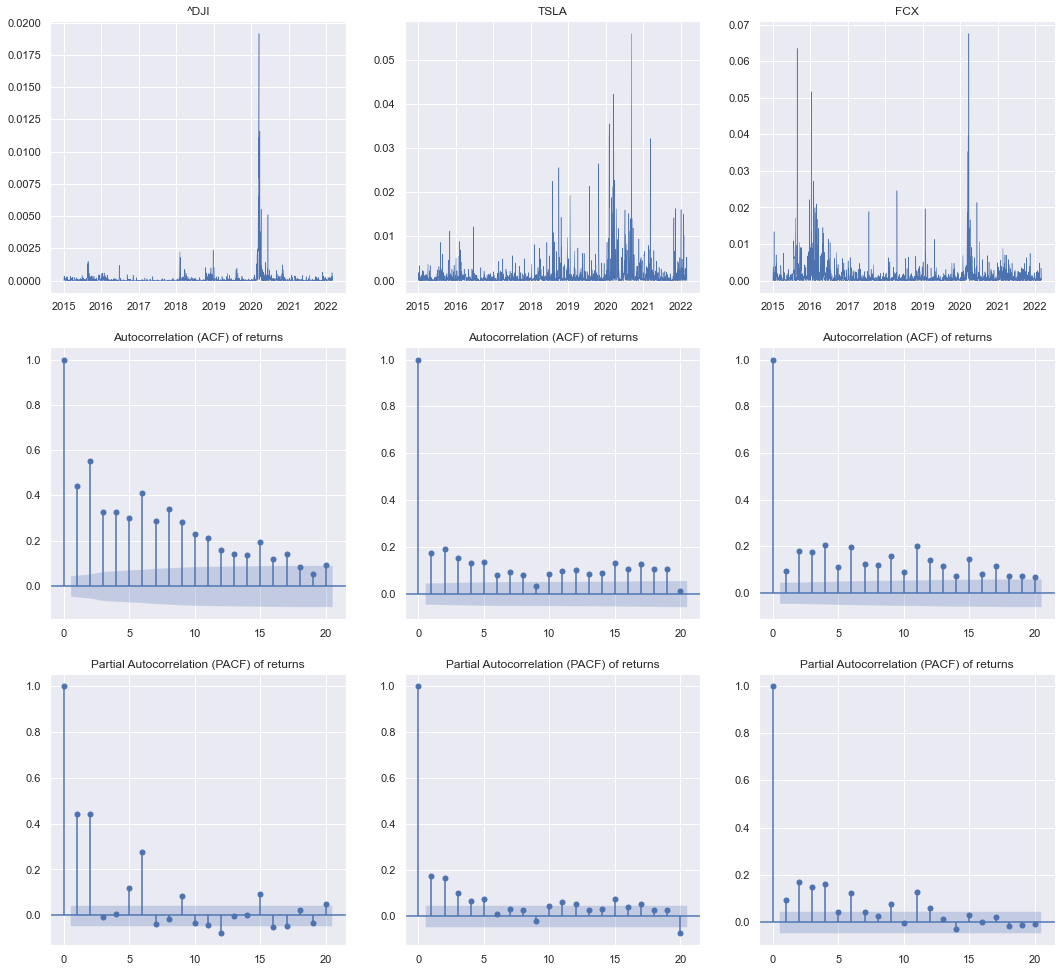

In [33]:
p.plot_TS(e,f,g,nlags=20,a=0.05)

**Visual Inspection of Squared Returns** a.k.a. volatility models

All equities experience long range dependency (exhibit autocorrelation) with respect to variance. Likewise, when observing squared returns we can see clustering of volatile periods e.g. returns of large magnitude tend to be followed by returns with large magnitude. The ACF of the squared returns illustrates the degree of persistence in variance and implies that GARCH modeling may be required.
* ACF and PACF of squared returns tells us something about the conditional variance of returns. As there are some significant values, a GARCH model would be relevant. Regarding squaring vs. taking the absolute return values, a stylized fact about financial returns says that the dependence is typically stronger in squares than in absolute values. Therefore, we want to find and model autoregressive patterns.


___

## Part 8: Engle's ARCH

In [34]:
p.ARCH_test(e) #DJI

8.391551685040878e-75

In [35]:
p.ARCH_test(f) #TSLA

3.284849285621197e-08

In [36]:
p.ARCH_test(g) #FCX

1.1260287774909305e-07

The ARCH Engle test is based on the null hypothesis that there are no ARCH effects against the alternative hypothesis that the data is characterised by ARCH disturbances. Since the test shows for all equities that the p-value are below 0.05 we can conlcude that the *returns* maintain ARCH effects. This supports the visual inspection of squared returns in question 7 where we observe **conditional heteroscedasticity** — or autocorrelation in the squared series which is said to have autoregressive conditional heteroscedastic (ARCH) effects.

___

## Part 9: Optimal GARCH Model (BIC)

## 9 (a)

In [37]:
l = ret_train['^DJI']
m = ret_train['TSLA']
n = ret_train['FCX']

In [38]:
DJI_GARCH = pd.DataFrame(p.GARCH(l))
TSLA_GARCH = pd.DataFrame(p.GARCH(m))
FCX_GARCH = pd.DataFrame(p.GARCH(n))

Iteration:      1,   Func. Count:      5,   Neg. LLF: 434987380511.74805
Iteration:      2,   Func. Count:     17,   Neg. LLF: 62471.266866306934
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6957.944826455436
Iteration:      4,   Func. Count:     37,   Neg. LLF: 477870350.2106925
Iteration:      5,   Func. Count:     49,   Neg. LLF: 5132707.4718191605
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5758.528379408432
            Iterations: 7
            Function evaluations: 57
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.023068422767247e+21
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2.256699130133347e+27
Iteration:      3,   Func. Count:     35,   Neg. LLF: 3.26350927920978e+22
Iteration:      4,   Func. Count:     50,   Neg. LLF: 2.0260825646440794e+17
Iteration:      5,   Func. Count:     65,   Neg. LLF: 1.3497108620424315e+18
Iteration:      6,   Func. Count:     80,   Neg.

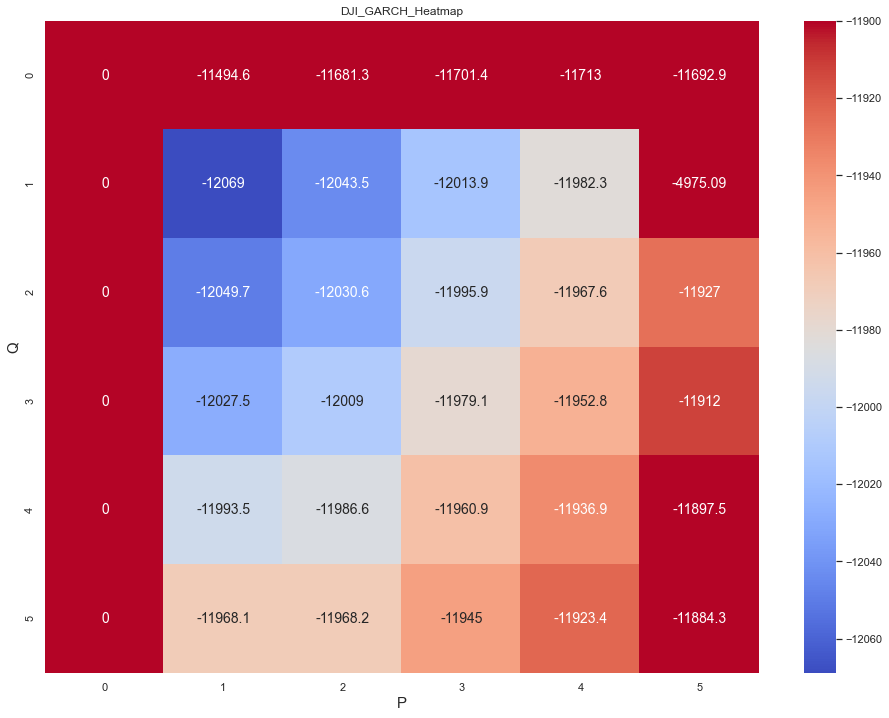

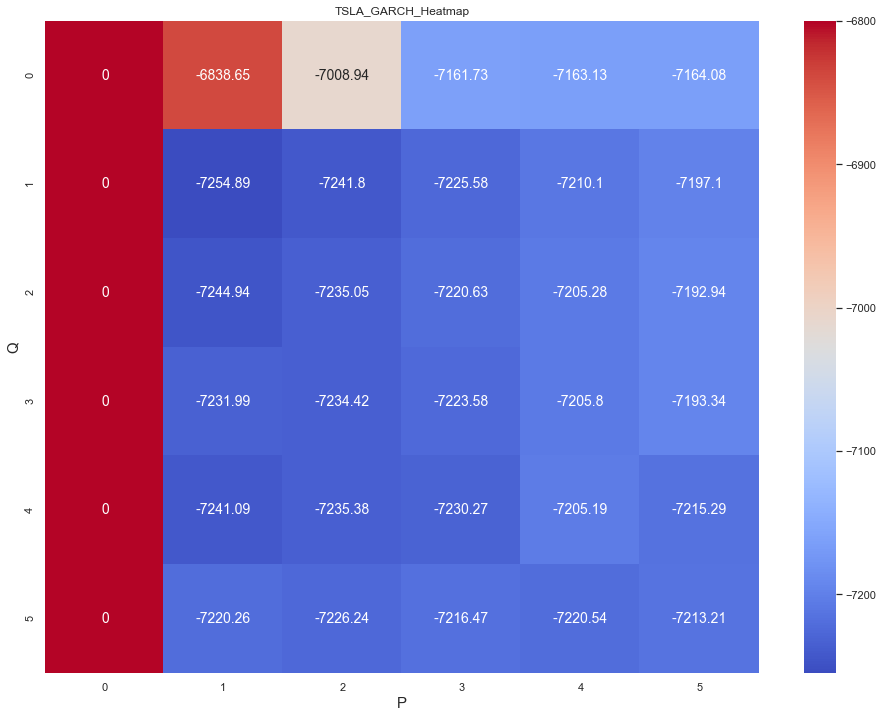

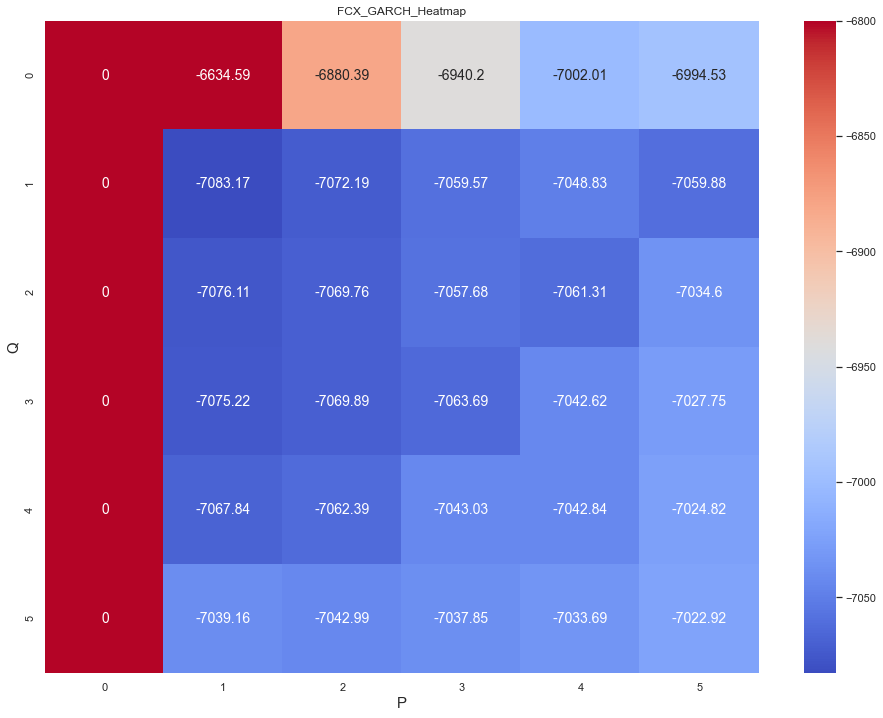

In [39]:
p.heatmap(DJI_GARCH,'DJI_GARCH_Heatmap',-12069,-11900)
p.heatmap(TSLA_GARCH,'TSLA_GARCH_Heatmap',-7255,-6800)
p.heatmap(FCX_GARCH,'FCX_GARCH_Heatmap',-7083,-6800)

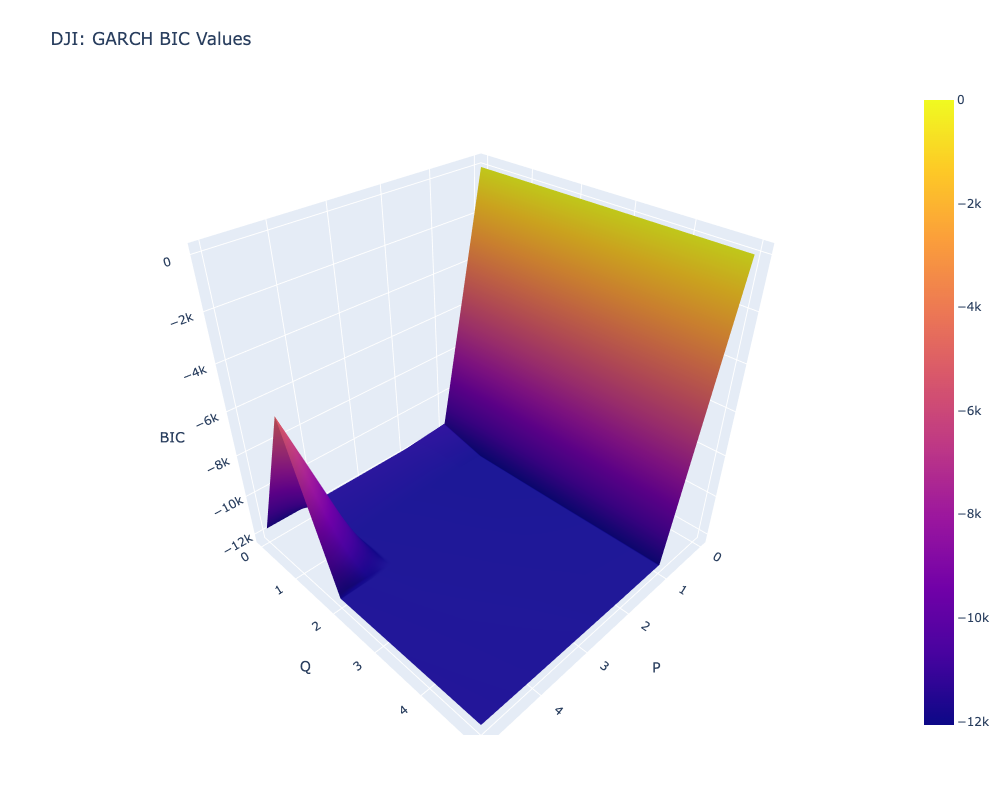

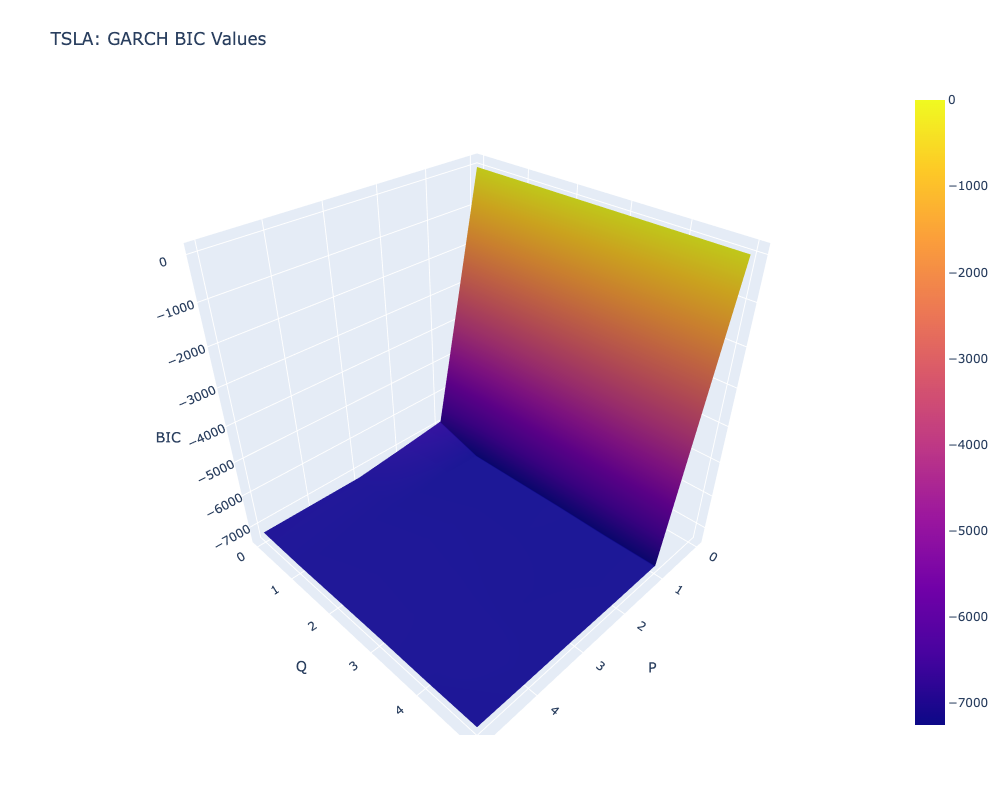

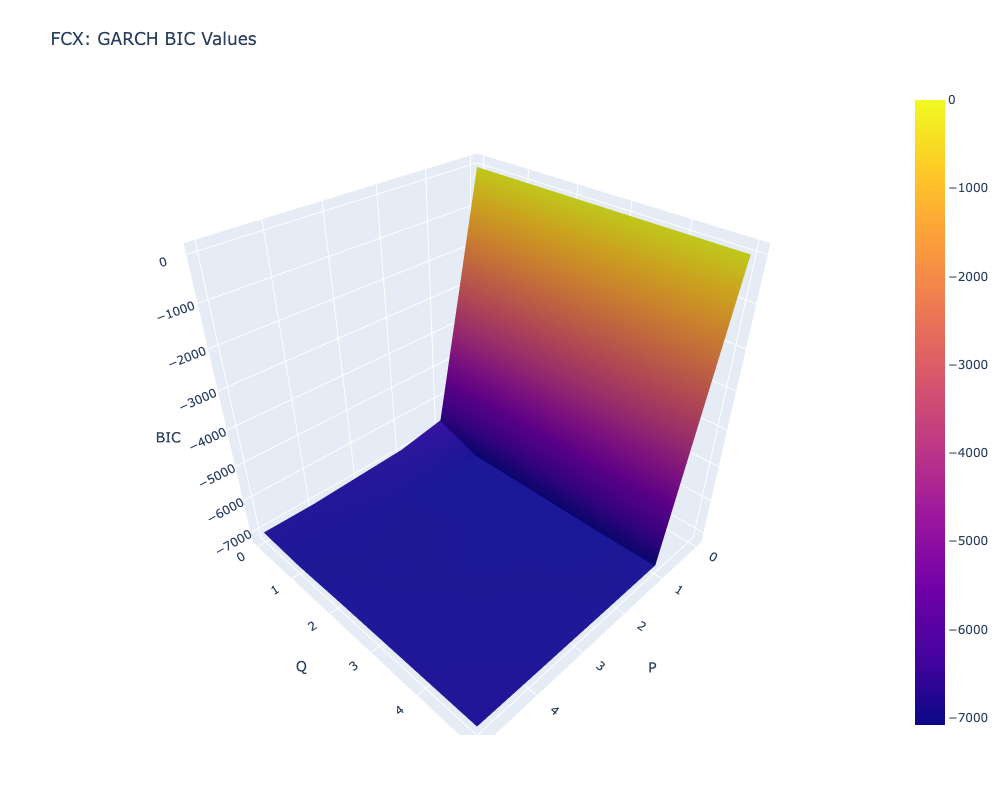

In [40]:
p.plotting_3D(DJI_GARCH,'DJI: GARCH BIC Values','BIC')
p.plotting_3D(TSLA_GARCH,'TSLA: GARCH BIC Values','BIC')
p.plotting_3D(FCX_GARCH,'FCX: GARCH BIC Values','BIC')

## 9 (b)

**Optimal GARCH Values Based on BIC**

* DJI: $GARCH(1,1)$ 
* TSLA: $GARCH(1, 1)$ 
* FCX: $GARCH(1, 1)$

## 9 (c)

In [41]:
def GARCH_MIN_RMSE(train,test,n=5):
    
    """This function iterates through all the possible combinations of 'P' and 'Q'
    to locate the model that minimises the RMSE"""
    
    for col in train.columns:
        for i in range(0,n+1):
            for j in range (0,n+1):
                current_train = [x for x in train[col]]
                current_test = [x for x in test[col]]
                predictions = []
                
                for t in range(len(current_test)):
                    try:
                        # estimate GARCH model
                        garch_mod = arch_model(current_train, p=i, o=0, q=j,vol='egarch')   
                        GARCH_RMSE = garch_mod.fit(disp='off') 
                        
                        # forecast 1 step ahead
                        output = GARCH_RMSE.forecast(horizon=1).mean.values[-1]

                        # save the output
                        predictions.append(float(output))   # ever growing list of predicted values
                        obs = current_test[t]      # your single actual value taken from the TEST data
                       
                        current_train.append(obs)  # ever growing list of actual values - these are the same as TEST data
                          
                    except ValueError:
                        
                        pass
                
                try:
                    error = mean_squared_error(current_test, predictions, squared=False)
                    print (col, F'{i},0,{j}','Test RMSE: %.5f' % error)   
                except ValueError:

                    pass

In [42]:
GARCH_MIN_RMSE(ret_train,ret_test,n=5)

^DJI 1,0,0 Test RMSE: 0.01394
^DJI 1,0,1 Test RMSE: 0.01398
^DJI 1,0,2 Test RMSE: 0.01398
^DJI 1,0,3 Test RMSE: 0.01398
^DJI 1,0,4 Test RMSE: 0.01398
^DJI 1,0,5 Test RMSE: 0.01398
^DJI 2,0,0 Test RMSE: 0.01392
^DJI 2,0,1 Test RMSE: 0.01398
^DJI 2,0,2 Test RMSE: 0.01397
^DJI 2,0,3 Test RMSE: 0.01398
^DJI 2,0,4 Test RMSE: 0.01398
^DJI 2,0,5 Test RMSE: 0.01397
^DJI 3,0,0 Test RMSE: 0.01395
^DJI 3,0,1 Test RMSE: 0.01398
^DJI 3,0,2 Test RMSE: 0.01397
^DJI 3,0,3 Test RMSE: 0.01398
^DJI 3,0,4 Test RMSE: 0.01398
^DJI 3,0,5 Test RMSE: 0.01398
^DJI 4,0,0 Test RMSE: 0.01398
^DJI 4,0,1 Test RMSE: 0.01398
^DJI 4,0,2 Test RMSE: 0.01397
^DJI 4,0,3 Test RMSE: 0.01398
^DJI 4,0,4 Test RMSE: 0.01398
^DJI 4,0,5 Test RMSE: 0.01398
^DJI 5,0,0 Test RMSE: 0.01398
^DJI 5,0,1 Test RMSE: 0.01397
^DJI 5,0,2 Test RMSE: 0.01397
^DJI 5,0,3 Test RMSE: 0.01397
^DJI 5,0,4 Test RMSE: 0.01397
^DJI 5,0,5 Test RMSE: 0.01397
TSLA 1,0,0 Test RMSE: 0.04541
TSLA 1,0,1 Test RMSE: 0.04538
TSLA 1,0,2 Test RMSE: 0.04538
TSLA 1,0,3

**Optimal GARCH Values Based on BIC using Mininum RMSE**

* DJI: $GARCH(2,0)$ 
* TSLA: $GARCH(5, 5)$ 
* FCX: $GARCH(5, 0)$

## 9 (d)

The favoured approach is the BIC Generalized Auto Re-gressive Conditional Heteroscedasticity values for P and Q. As with ARCH, GARCH predicts the future variance and expects that the series is stationary, other than the change in variance, meaning it does not have a trend or seasonal component. Similarly to question 5(c) the minimal RMSE values are unreliable due to the lack of test sample and tendency to gravitate towards overfitting parameters to achieve a lower RMSE. Alternatively, the P/Q values following GARCH processes demonstrate an enhanced ability to capture the characteristics of stochastic data. Ultimately, the introduction of a moving average component allows the model to both model the conditional change in variance over time as well as changes in the time-dependent variance. For this reason, it is strongly recommended to use the BIC GARCH(p,q) model.

___

## Part 10: Optimal GARCH Model (Student t)

## 10 (a)

In [43]:
DJI_StudentT = pd.DataFrame(p.T_GARCH(l))
TSLA_StudentT = pd.DataFrame(p.T_GARCH(m))
FCX_StudentT = pd.DataFrame(p.T_GARCH(n))

Iteration:      1,   Func. Count:      6,   Neg. LLF: 50595.82671384988
Iteration:      2,   Func. Count:     21,   Neg. LLF: 9217.760912146636
Iteration:      3,   Func. Count:     28,   Neg. LLF: 8468.780136444879
Iteration:      4,   Func. Count:     34,   Neg. LLF: 9197.413657240262
Iteration:      5,   Func. Count:     40,   Neg. LLF: 98689.10391382544
Iteration:      6,   Func. Count:     48,   Neg. LLF: 7116.706569367373
Iteration:      7,   Func. Count:     56,   Neg. LLF: 2098.0566604448686
Iteration:      8,   Func. Count:     64,   Neg. LLF: 790303.5024658053
Iteration:      9,   Func. Count:     79,   Neg. LLF: 18839.1524807503
Iteration:     10,   Func. Count:     84,   Neg. LLF: 21712.6679796292
Iteration:     11,   Func. Count:     94,   Neg. LLF: 15771.62063168482
Iteration:     12,   Func. Count:     99,   Neg. LLF: 1540458.8478006842
Iteration:     13,   Func. Count:    107,   Neg. LLF: 11609.579544198892
Iteration:     14,   Func. Count:    113,   Neg. LLF: 9551.1367

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:      9,   Func. Count:     95,   Neg. LLF: 245763.76609951368
Iteration:     10,   Func. Count:    113,   Neg. LLF: 178785.1719141147
Iteration:     11,   Func. Count:    128,   Neg. LLF: 1037.1688459773602
Iteration:     12,   Func. Count:    136,   Neg. LLF: 237098.86276503286
Iteration:     13,   Func. Count:    154,   Neg. LLF: 2880.5288050540016
Iteration:     14,   Func. Count:    162,   Neg. LLF: 6021.340968441726
Iteration:     15,   Func. Count:    171,   Neg. LLF: 5322.226955228177
Iteration:     16,   Func. Count:    180,   Neg. LLF: 785544.5454276988
Iteration:     17,   Func. Count:    191,   Neg. LLF: 1604.3068887609395
Iteration:     18,   Func. Count:    201,   Neg. LLF: 202383.37958457388
Iteration:     19,   Func. Count:    219,   Neg. LLF: 6936.536908053036
Iteration:     20,   Func. Count:    227,   Neg. LLF: 7336.029994832084
Iteration:     21,   Func. Count:    237,   Neg. LLF: 1939.7605632217546
Iteration:     22,   Func. Count:    244,   Neg. LLF: 193

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.


/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:     22,   Func. Count:    315,   Neg. LLF: 733527.1167300157
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 733527.116408325
            Iterations: 26
            Function evaluations: 315
            Gradient evaluations: 22
Iteration:      1,   Func. Count:      7,   Neg. LLF: 50429.48879450788
Iteration:      2,   Func. Count:     23,   Neg. LLF: 8648.152980664161
Iteration:      3,   Func. Count:     30,   Neg. LLF: 8017.421248379618
Iteration:      4,   Func. Count:     36,   Neg. LLF: 3764.511513622193
Iteration:      5,   Func. Count:     42,   Neg. LLF: 255376.72695706546
Iteration:      6,   Func. Count:     57,   Neg. LLF: 2646.477757018248
Iteration:      7,   Func. Count:     64,   Neg. LLF: 1358.5519316298996
Iteration:      8,   Func. Count:     71,   Neg. LLF: 2.324919254163332
Iteration:      9,   Func. Count:     79,   Neg. LLF: 30304.461735544144
Iteration:     10,   Func. Count:     92,   Neg. LLF: 6963

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:     28,   Func. Count:    295,   Neg. LLF: 32652.013181719518
Iteration:     29,   Func. Count:    305,   Neg. LLF: 9133.963202271783
Iteration:     30,   Func. Count:    313,   Neg. LLF: 7464.543864384441
Iteration:     31,   Func. Count:    321,   Neg. LLF: 4438.843388456733
Iteration:     32,   Func. Count:    329,   Neg. LLF: 5970.438446094187
Iteration:     33,   Func. Count:    338,   Neg. LLF: 3754.268281573432
Iteration:     34,   Func. Count:    347,   Neg. LLF: 1665.656062109223
Iteration:     35,   Func. Count:    356,   Neg. LLF: -553.993017128646
Iteration:     36,   Func. Count:    365,   Neg. LLF: -3105.5633391102065
Iteration:     37,   Func. Count:    374,   Neg. LLF: 62429.92183592389
Iteration:     38,   Func. Count:    392,   Neg. LLF: 19397.8475236015
Iteration:     39,   Func. Count:    400,   Neg. LLF: 41741.564134341825
Iteration:     40,   Func. Count:    413,   Neg. LLF: 12224.494832861708
Iteration:     41,   Func. Count:    428,   Neg. LLF: 63544.

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:      6,   Func. Count:     84,   Neg. LLF: 6343883.719615258
Iteration:      7,   Func. Count:    103,   Neg. LLF: 31551.54077310749
Iteration:      8,   Func. Count:    115,   Neg. LLF: 13127.251100845082
Iteration:      9,   Func. Count:    125,   Neg. LLF: 36739.16478197181
Iteration:     10,   Func. Count:    141,   Neg. LLF: 1756.8361378014583
Iteration:     11,   Func. Count:    151,   Neg. LLF: 4789752.928185315
Iteration:     12,   Func. Count:    165,   Neg. LLF: -4110.954873253524
Iteration:     13,   Func. Count:    174,   Neg. LLF: 13260.836814190996
Iteration:     14,   Func. Count:    189,   Neg. LLF: 322021.5063402762
Iteration:     15,   Func. Count:    208,   Neg. LLF: 282418.7123729503
Iteration:     16,   Func. Count:    225,   Neg. LLF: 59726.22969965087
Iteration:     17,   Func. Count:    243,   Neg. LLF: 46995.907227227646
Optimization terminated successfully    (Exit mode 0)
            Current function value: 46995.9072180409
            Iterations: 

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:     16,   Func. Count:    237,   Neg. LLF: 41527.30340465728
Iteration:     17,   Func. Count:    258,   Neg. LLF: 1687.5404423495952
Iteration:     18,   Func. Count:    269,   Neg. LLF: 6908.015699742689
Iteration:     19,   Func. Count:    283,   Neg. LLF: 5564.391719934358
Iteration:     20,   Func. Count:    297,   Neg. LLF: 471279.17349556333
Iteration:     21,   Func. Count:    318,   Neg. LLF: 23575.953897247287
Iteration:     22,   Func. Count:    329,   Neg. LLF: 54915.983189162
Iteration:     23,   Func. Count:    346,   Neg. LLF: 21362.71794721543
Iteration:     24,   Func. Count:    357,   Neg. LLF: 18543.011347110052
Iteration:     25,   Func. Count:    368,   Neg. LLF: 27539.889142704516
Iteration:     26,   Func. Count:    381,   Neg. LLF: 4477.1292506560985
Iteration:     27,   Func. Count:    399,   Neg. LLF: 44164.19263696043
Iteration:     28,   Func. Count:    412,   Neg. LLF: 35711.51147786093
Iteration:     29,   Func. Count:    433,   Neg. LLF: 2049.4

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:      9,   Func. Count:     93,   Neg. LLF: 4228.202533404761
Iteration:     10,   Func. Count:    104,   Neg. LLF: 349902.97504892555
Iteration:     11,   Func. Count:    121,   Neg. LLF: 493630.4572919744
Iteration:     12,   Func. Count:    138,   Neg. LLF: 1070294.7895192294
Iteration:     13,   Func. Count:    146,   Neg. LLF: 9891.528785924158
Iteration:     14,   Func. Count:    154,   Neg. LLF: 190876.87384323313
Iteration:     15,   Func. Count:    166,   Neg. LLF: 4505.076486296811
Iteration:     16,   Func. Count:    177,   Neg. LLF: -4386.468844565365
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4386.468844573256
            Iterations: 20
            Function evaluations: 177
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      9,   Neg. LLF: 72030.11593083158
Iteration:      2,   Func. Count:     27,   Neg. LLF: 10655.410435165893
Iteration:      3,   Func. Count:     36,   Neg. LLF: 9782.70701

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.


/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:     14,   Func. Count:    182,   Neg. LLF: 43828.19233516882
Iteration:     15,   Func. Count:    196,   Neg. LLF: 7729.639495877017
Iteration:     16,   Func. Count:    215,   Neg. LLF: 27666.75623323478
Iteration:     17,   Func. Count:    229,   Neg. LLF: 1299070.5554291974
Iteration:     18,   Func. Count:    248,   Neg. LLF: 59318.187621637684
Iteration:     19,   Func. Count:    266,   Neg. LLF: 1098096.1143083454
Iteration:     20,   Func. Count:    282,   Neg. LLF: -3592.515484650062
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3592.5154846506643
            Iterations: 24
            Function evaluations: 282
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     11,   Neg. LLF: 55964.05486344248
Iteration:      2,   Func. Count:     31,   Neg. LLF: 9799.392480931316
Iteration:      3,   Func. Count:     41,   Neg. LLF: 6153.529523747942
Iteration:      4,   Func. Count:     51,   Neg. LLF: 

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:      1,   Func. Count:      9,   Neg. LLF: 71656.0147203285
Iteration:      2,   Func. Count:     27,   Neg. LLF: 9757.865420218375
Iteration:      3,   Func. Count:     36,   Neg. LLF: 66375.39318932535
Iteration:      4,   Func. Count:     47,   Neg. LLF: 5321.9491075972455
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5274.265217844184
Iteration:      6,   Func. Count:     68,   Neg. LLF: 240103.33084479027
Iteration:      7,   Func. Count:     86,   Neg. LLF: 22754.47366755938
Iteration:      8,   Func. Count:     94,   Neg. LLF: 22642.696708523505
Iteration:      9,   Func. Count:    112,   Neg. LLF: 53000.607435135884
Iteration:     10,   Func. Count:    130,   Neg. LLF: 32554.02807766892
Iteration:     11,   Func. Count:    140,   Neg. LLF: 18983.061512141107
Iteration:     12,   Func. Count:    150,   Neg. LLF: 10037.376612785682
Iteration:     13,   Func. Count:    164,   Neg. LLF: 26221.68399807598
Iteration:     14,   Func. Count:    182,   Neg. LLF: 7825.

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:      5,   Func. Count:     71,   Neg. LLF: 1217.273248449062
Iteration:      6,   Func. Count:     83,   Neg. LLF: 5892.852733571398
Iteration:      7,   Func. Count:     99,   Neg. LLF: 188477.6404653659
Iteration:      8,   Func. Count:    120,   Neg. LLF: 111003.40085068709
Iteration:      9,   Func. Count:    137,   Neg. LLF: 3484.6046161120357
Iteration:     10,   Func. Count:    152,   Neg. LLF: 40658.98169512632
Iteration:     11,   Func. Count:    173,   Neg. LLF: 3136.184095070248
Iteration:     12,   Func. Count:    184,   Neg. LLF: 3146.8026637237463
Iteration:     13,   Func. Count:    196,   Neg. LLF: 6060.892114012051
Iteration:     14,   Func. Count:    209,   Neg. LLF: 418479.74867747084
Iteration:     15,   Func. Count:    230,   Neg. LLF: 215876.2717062955
Iteration:     16,   Func. Count:    242,   Neg. LLF: 4001.5724623930073
Iteration:     17,   Func. Count:    253,   Neg. LLF: 4683.0559338262265
Iteration:     18,   Func. Count:    265,   Neg. LLF: 2502

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:      4,   Func. Count:     68,   Neg. LLF: 463966.8789216238
Iteration:      5,   Func. Count:     90,   Neg. LLF: 17873.837179699956
Iteration:      6,   Func. Count:    103,   Neg. LLF: 17735.870669815573
Iteration:      7,   Func. Count:    116,   Neg. LLF: 28670.200603042926
Iteration:      8,   Func. Count:    130,   Neg. LLF: 13844.962609530983
Iteration:      9,   Func. Count:    143,   Neg. LLF: 156743.15952331235
Iteration:     10,   Func. Count:    158,   Neg. LLF: 214345.1958033646
Iteration:     11,   Func. Count:    171,   Neg. LLF: 6382.69639056173
Iteration:     12,   Func. Count:    184,   Neg. LLF: 477286.8236431772
Iteration:     13,   Func. Count:    206,   Neg. LLF: 6704.979847025479
Iteration:     14,   Func. Count:    217,   Neg. LLF: 6704.979847024577
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6704.979847025479
            Iterations: 18
            Function evaluations: 217
            Gradient evaluation

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:     15,   Func. Count:    279,   Neg. LLF: 17508.953035792914
Iteration:     16,   Func. Count:    293,   Neg. LLF: 16534.256108608213
Iteration:     17,   Func. Count:    306,   Neg. LLF: 16454.064180460227
Iteration:     18,   Func. Count:    319,   Neg. LLF: 32530.340647651636
Iteration:     19,   Func. Count:    335,   Neg. LLF: 91511.84140438512
Iteration:     20,   Func. Count:    358,   Neg. LLF: 53960.25741943995
Iteration:     21,   Func. Count:    371,   Neg. LLF: 104156.08845078059
Iteration:     22,   Func. Count:    394,   Neg. LLF: 3808986.101845039
Iteration:     23,   Func. Count:    415,   Neg. LLF: 53434.87319795184
Iteration:     24,   Func. Count:    428,   Neg. LLF: 53427.543245890876
Iteration:     25,   Func. Count:    441,   Neg. LLF: 53427.1872185625
Iteration:     26,   Func. Count:    454,   Neg. LLF: 53427.02997259263
Iteration:     27,   Func. Count:    467,   Neg. LLF: 53426.10829999216
Iteration:     28,   Func. Count:    480,   Neg. LLF: 53421

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:      5,   Func. Count:     96,   Neg. LLF: -3638.010663233808
Iteration:      6,   Func. Count:    111,   Neg. LLF: 1625737.880218176
Iteration:      7,   Func. Count:    135,   Neg. LLF: 76069.90013375814
Iteration:      8,   Func. Count:    159,   Neg. LLF: 109684.76670512604
Iteration:      9,   Func. Count:    180,   Neg. LLF: 1969.2834985569245
Iteration:     10,   Func. Count:    195,   Neg. LLF: 2796.445108373292
Iteration:     11,   Func. Count:    213,   Neg. LLF: 37250.53524274299
Iteration:     12,   Func. Count:    237,   Neg. LLF: 194294.7958131694
Iteration:     13,   Func. Count:    261,   Neg. LLF: 4310.988100257071
Iteration:     14,   Func. Count:    275,   Neg. LLF: 29303.994688838
Iteration:     15,   Func. Count:    290,   Neg. LLF: 323925.60151589976
Iteration:     16,   Func. Count:    305,   Neg. LLF: 8722881.166792683
Iteration:     17,   Func. Count:    322,   Neg. LLF: 2868.5061075503027
Iteration:     18,   Func. Count:    338,   Neg. LLF: -1142.0

/Users/lachieomalley/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.




Iteration:     24,   Func. Count:    249,   Neg. LLF: -2879.016904826278
Iteration:     25,   Func. Count:    257,   Neg. LLF: 1663.3240795945194
Iteration:     26,   Func. Count:    266,   Neg. LLF: -2758.0740011222106
Iteration:     27,   Func. Count:    274,   Neg. LLF: -267.1941030421894
Iteration:     28,   Func. Count:    282,   Neg. LLF: -3299.9500938973897
Iteration:     29,   Func. Count:    290,   Neg. LLF: -3244.6219671497292
Iteration:     30,   Func. Count:    298,   Neg. LLF: -3310.8726917925183
Iteration:     31,   Func. Count:    306,   Neg. LLF: -3091.5425291089196
Iteration:     32,   Func. Count:    314,   Neg. LLF: -3352.4675162498916
Iteration:     33,   Func. Count:    322,   Neg. LLF: -3212.735379326068
Iteration:     34,   Func. Count:    330,   Neg. LLF: -3387.9436362840497
Iteration:     35,   Func. Count:    338,   Neg. LLF: -3289.2354742587167
Iteration:     36,   Func. Count:    346,   Neg. LLF: -3586.0678538962347
Iteration:     37,   Func. Count:    354, 

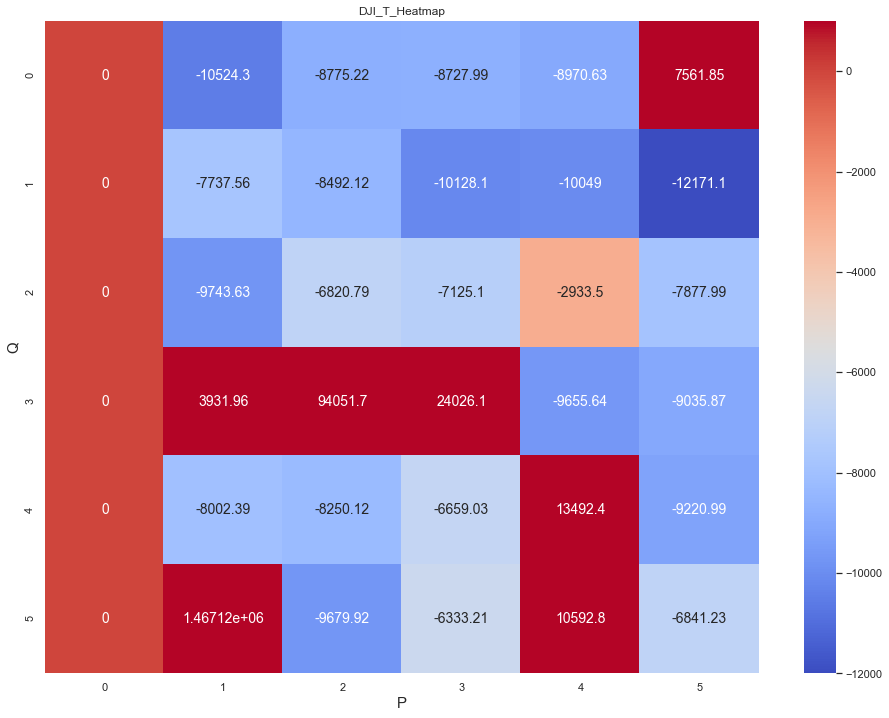

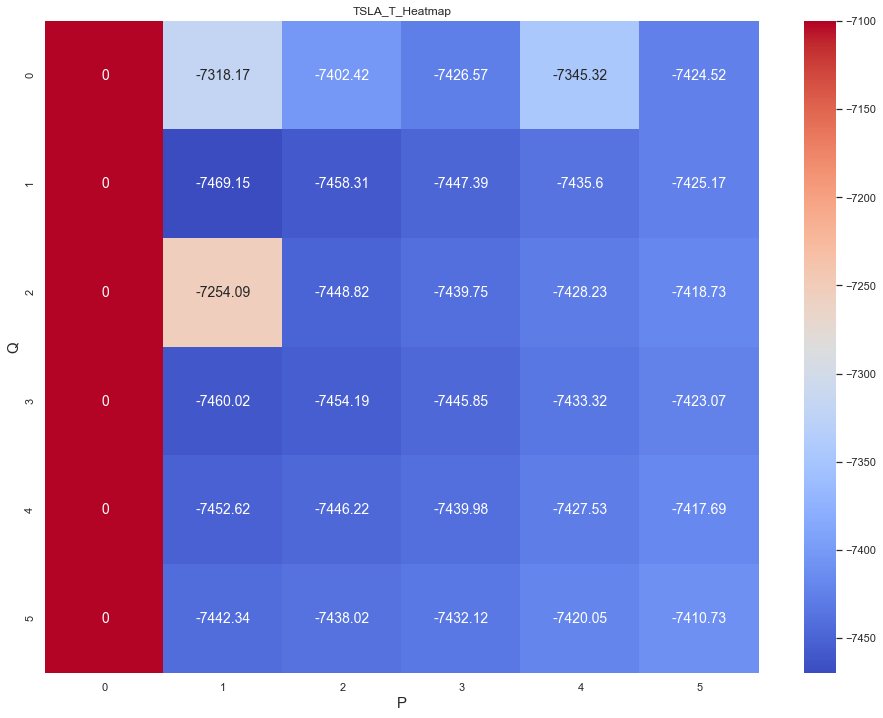

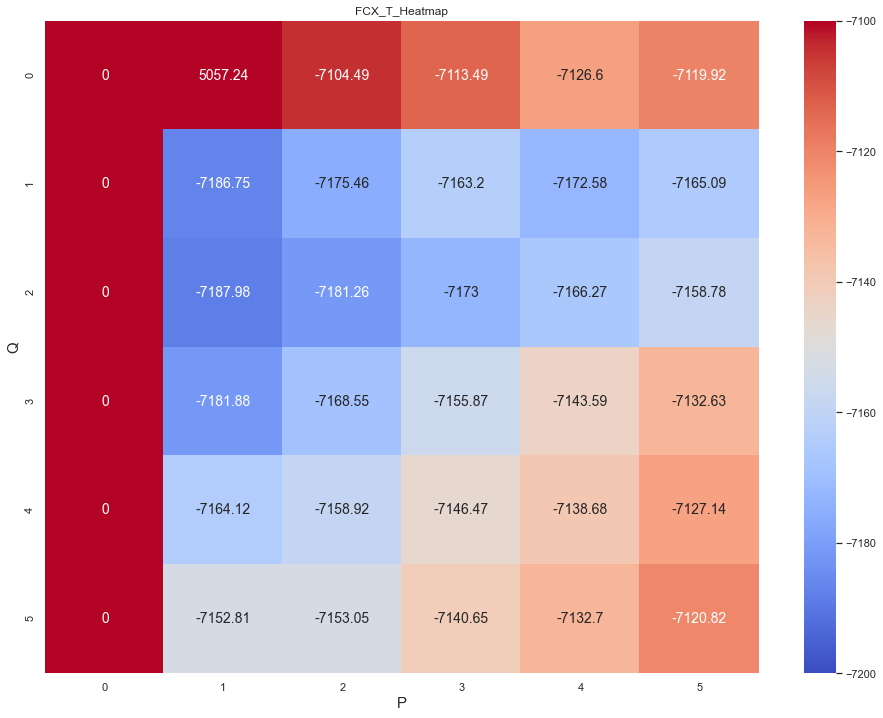

In [44]:
p.heatmap(DJI_StudentT,'DJI_T_Heatmap',-12000,1000)
p.heatmap(TSLA_StudentT,'TSLA_T_Heatmap',-7470,-7100)
p.heatmap(FCX_StudentT,'FCX_T_Heatmap',-7200,-7100)

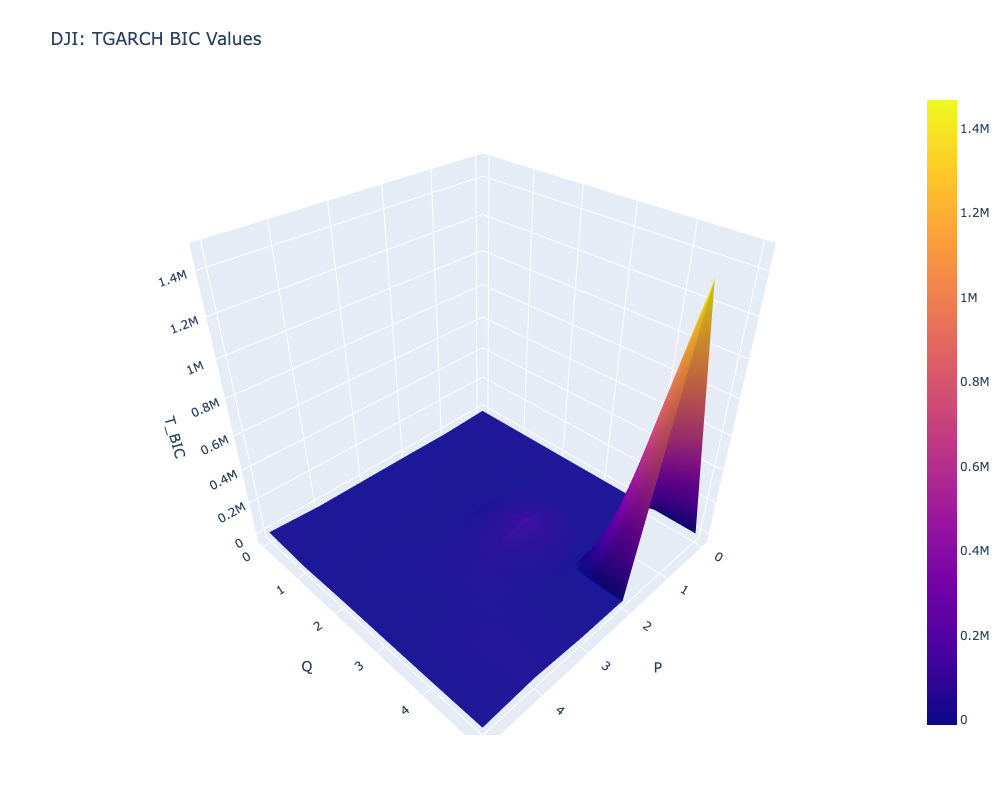

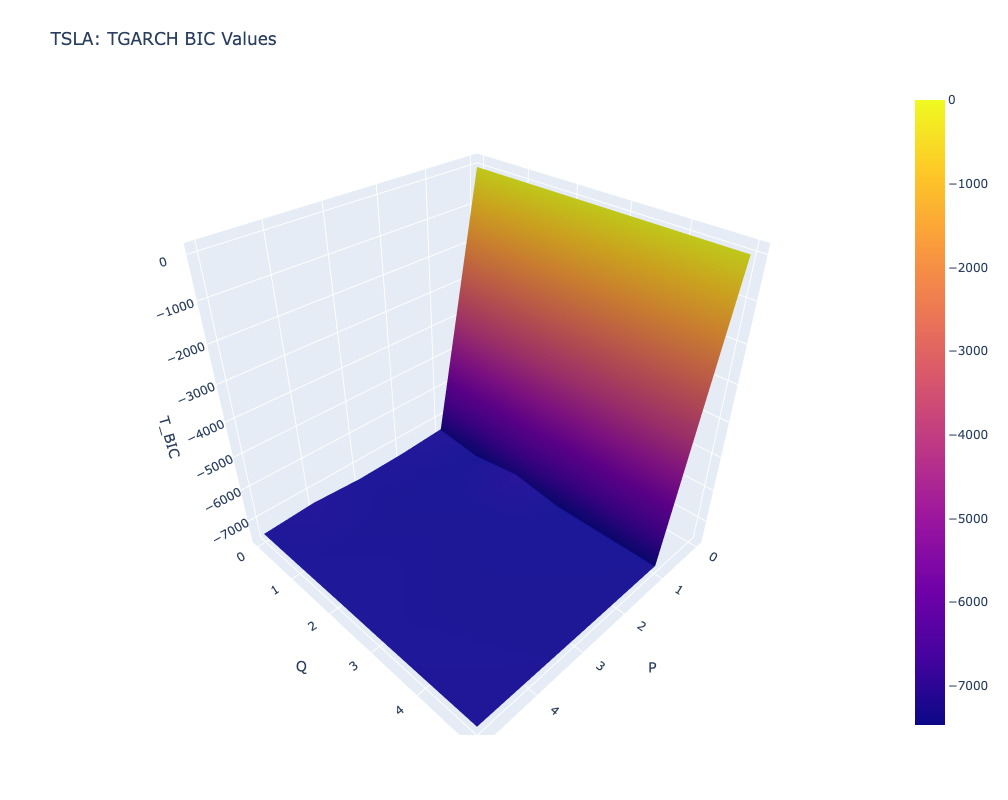

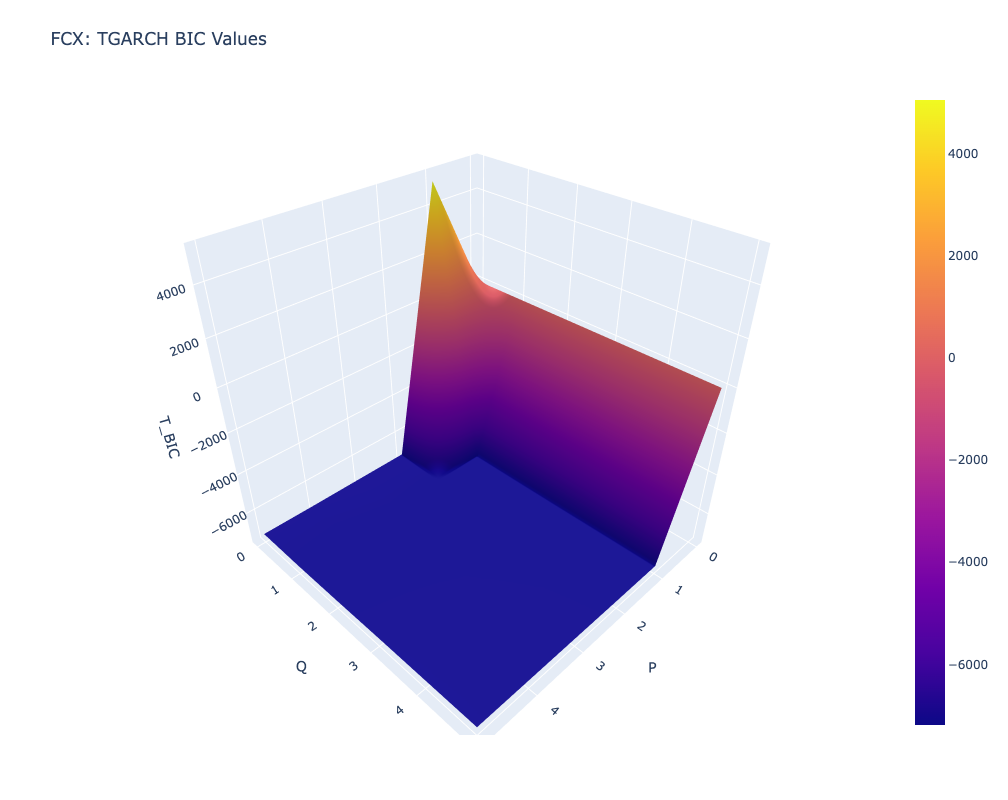

In [45]:
p.plotting_3D(DJI_StudentT,'DJI: TGARCH BIC Values','T_BIC')
p.plotting_3D(TSLA_StudentT,'TSLA: TGARCH BIC Values','T_BIC')
p.plotting_3D(FCX_StudentT,'FCX: TGARCH BIC Values','T_BIC')

## 10 (b)

**Optimal GARCH Student T Values Based on BIC**

* DJI: $GARCH(5,1)$ 
* TSLA: $GARCH(1, 1)$ 
* FCX: $GARCH(1, 2)$

**Findings**

* Heatmap highlights that when BIC is highly positive something went wrong (likely due to too many restrictions on model)
* T-Distribution has heavier tails than normal distribution. Therein, the T distributions has a greater chance for extreme values than normal distributions, hence the fatter tails.
* Too many parameters being estimated in GARCH process is poor for forecasting.

**Conclusion:**

 * Using Student T-residuals is inefficent in distinguishing optimal P,Q values for the GARCH model. It provides a biased and inconsistent estimator of paramaters. In regards to the optimal model the $GARCH(p, q)$ using normal distribution is most efficent.
